<a href="https://colab.research.google.com/github/salmansrizon/Python_Examples/blob/master/Neural_Network_with_Irish_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Loading tensorflow
import tensorflow as tf
from tensorflow import keras
tf.__version__
# Loading helping library
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Loding the Dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [12]:
# Value of one pixel
train_images[0,23,23]
# Loking at the value of 10th label
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [0]:
# Our labels are integers ranging from 0 - 9. Each integer represents a specific article of clothing. We'll create an array of label names to indicate which is which.
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

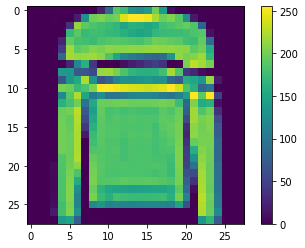

In [15]:
# Loking at a sample image
plt.figure()
plt.imshow(train_images[5]) #selecting the index  image for display
plt.colorbar()
plt.grid(False)
plt.show()

**Data Processing**


In [0]:
train_images = train_images / 255.0  #normalizing the value between 0-1
test_images = test_images / 255.0

**Building The model**

In [17]:
model = keras.Sequential([
      keras.layers.Flatten(input_shape = (28,28)), #defining the input layer of the model
      keras.layers.Dense(128, activation='relu'), #defining the hidden layer with 128 nodes
      keras.layers.Dense(10, activation='softmax') #defining the output layer with 10 nodes
])

ERROR! Session/line number was not unique in database. History logging moved to new session 59


**Compile the model**

In [0]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Train The model**

In [20]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4954 - accuracy: 0.8256
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3743 - accuracy: 0.8645
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3366 - accuracy: 0.8779
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3108 - accuracy: 0.8860
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2930 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2793 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2658 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2559 - accuracy: 0.9045
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2468 - accuracy: 0.9081
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.237

**Evaluating the model**

In [22]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose= 1)

print('Test accuracy', test_acc)
print('Test Loss', test_loss)

313/313 [==============================] - 0s 1ms/step - loss: 0.3314 - accuracy: 0.8840
Test accuracy 0.8840000033378601
Test Loss 0.33143168687820435


**Making Prediction**

In [0]:
prediction = model.predict(test_images)

In [24]:
prediction[1] #prediction the 2 nd index of the test dataset

array([4.6567816e-06, 3.8817310e-16, 9.9858993e-01, 5.4974623e-12,
       4.5238933e-04, 2.5798151e-12, 9.5307740e-04, 3.5521310e-12,
       7.3875983e-10, 4.8068717e-14], dtype=float32)

In [25]:
np.argmax(prediction[1]) # Displaying the max value from the prediction array

2

In [26]:
test_labels[1]

2

**Verifying Prediction**

Pick a number: 1000


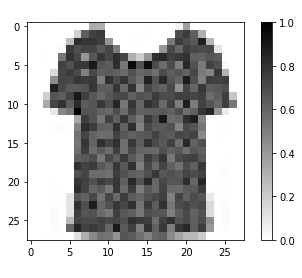

In [31]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
